In [1]:
import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.utils import class_weight

from sklearn.metrics import accuracy_score, r2_score, f1_score, classification_report

In [2]:
seed = 1234
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
all_data = pd.read_csv('../../Data/TRANSFORMED_DATA/transformed_fep_data.csv')

In [4]:
all_data.groupby('id').size().describe()

count      75.000000
mean      369.746667
std       221.494378
min        46.000000
25%       226.000000
50%       333.000000
75%       445.000000
max      1178.000000
dtype: float64

In [5]:
all_data = all_data[['id', 'xHolo', 'yHolo', 'zHolo', 'Zeni', 'Zeni_transformed']]

In [6]:
all_data['seq_idx'] = all_data.groupby('id').cumcount()

## Pivot sequences

In [7]:
seq_holo_data = all_data.pivot(index='id', columns='seq_idx', values=['xHolo', 'yHolo', 'zHolo', 'Zeni_transformed'])

In [8]:
seq_holo_data.shape

(75, 4712)

In [9]:
seq_holo_data.head()

xHolo                                                    \
seq_idx         0         1         2         3         4         5      
id                                                                       
10_hlth     0.285392  0.283923  0.282483  0.281089  0.279760  0.278511   
10_lvl_one  0.406587  0.404806  0.402873  0.400800  0.398598  0.396275   
10_lvl_two  0.360396  0.362951  0.365095  0.366837  0.368196  0.369199   
11_hlth     0.314562  0.313492  0.312400  0.311276  0.310112  0.308897   
11_lvl_one  0.329497  0.328270  0.327006  0.325701  0.324351  0.322951   

                                                    ... Zeni_transformed       \
seq_idx         6         7         8         9     ...             1168 1169   
id                                                  ...                         
10_hlth     0.277359  0.276317  0.275395  0.274602  ...              NaN  NaN   
10_lvl_one  0.393842  0.391304  0.388671  0.385947  ...              NaN  NaN   
10_lvl_two  0.369881  0.370278  0.370430  0.370375  ...              NaN  NaN   
11_hlth     0.307623  0.306282  0.304868  0.303377  ...              NaN  NaN   
11_lvl_one  0.321492  0.319969  0.318376  0.316705  ...              NaN  NaN   

                                                    
seq_idx    1170 1171 1172 1173 1174 1175 1176 1177  
id                                                  
10_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10_lvl_two  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 4712 columns]

In [10]:
#seq_holo_data.describe()

In [11]:
seq_holo_data.Zeni_transformed

seq_idx,0,1,2,3,4,5,6,7,8,9,...,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177
id,,,,,,,,,,,,,,,,,,,,,
10_hlth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_lvl_one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_lvl_two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11_hlth,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11_lvl_one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_lvl_one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_lvl_two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9_hlth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3D to 1D projection

In [13]:
train_df = seq_holo_data.loc[[idx for idx in seq_holo_data.index if not idx.startswith('10_')],:]
test_df = seq_holo_data.loc[[idx for idx in seq_holo_data.index if idx.startswith('10_')],:]

In [19]:
train_df

xHolo                                                    \
seq_idx         0         1         2         3         4         5      
id                                                                       
11_hlth     0.314562  0.313492  0.312400  0.311276  0.310112  0.308897   
11_lvl_one  0.329497  0.328270  0.327006  0.325701  0.324351  0.322951   
11_lvl_two  0.342550  0.341885  0.341187  0.340467  0.339734  0.338994   
12_hlth     0.191283  0.191382  0.191559  0.191814  0.192148  0.192562   
12_lvl_one  0.293994  0.291083  0.288221  0.285421  0.282698  0.280063   
...              ...       ...       ...       ...       ...       ...   
8_lvl_one   0.269693  0.271648  0.273580  0.275480  0.277342  0.279162   
8_lvl_two   0.372910  0.373018  0.373125  0.373224  0.373310  0.373376   
9_hlth      0.330707  0.330411  0.330061  0.329656  0.329196  0.328677   
9_lvl_one   0.378556  0.377586  0.376567  0.375500  0.374390  0.373239   
9_lvl_two   0.379194  0.379202  0.379151  0.379046  0.378890  0.378687   

                                                    ... Zeni_transformed       \
seq_idx         6         7         8         9     ...             1168 1169   
id                                                  ...                         
11_hlth     0.307623  0.306282  0.304868  0.303377  ...              NaN  NaN   
11_lvl_one  0.321492  0.319969  0.318376  0.316705  ...              NaN  NaN   
11_lvl_two  0.338255  0.337520  0.336792  0.336074  ...              NaN  NaN   
12_hlth     0.193056  0.193632  0.194291  0.195033  ...              NaN  NaN   
12_lvl_one  0.277525  0.275094  0.272774  0.270571  ...              NaN  NaN   
...              ...       ...       ...       ...  ...              ...  ...   
8_lvl_one   0.280933  0.282651  0.284315  0.285919  ...              NaN  NaN   
8_lvl_two   0.373410  0.373400  0.373330  0.373189  ...              NaN  NaN   
9_hlth      0.328100  0.327462  0.326762  0.325997  ...              NaN  NaN   
9_lvl_one   0.372052  0.370834  0.369589  0.368324  ...              NaN  NaN   
9_lvl_two   0.378439  0.378151  0.377824  0.377459  ...              NaN  NaN   

                                                    
seq_idx    1170 1171 1172 1173 1174 1175 1176 1177  
id                                                  
11_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_two  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ...  ...  ...  ...  ...  
8_lvl_one   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8_lvl_two   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_hlth      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_lvl_one   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_lvl_two   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[72 rows x 4712 columns]

In [20]:
X_train_df = train_df[['xHolo', 'yHolo', 'zHolo']]
y_train_df = train_df['Zeni_transformed']

X_test_df = test_df[['xHolo', 'yHolo', 'zHolo']]
y_test_df = test_df['Zeni_transformed']

In [21]:
def smv(mat):
    return np.sqrt(np.sum([mat.xHolo**2, mat.yHolo**2, mat.zHolo**2], axis=0))

In [22]:
smv_X_train_df = pd.DataFrame(
    np.concatenate(
        X_train_df.groupby(level = 1, axis = 1).apply(smv).values
    ).reshape(1178, -1)
).T

smv_X_test_df = pd.DataFrame(
    np.concatenate(
        X_test_df.groupby(level = 1, axis = 1).apply(smv).values
    ).reshape(1178, -1)
).T

In [23]:
smv_X_train_df.fillna(0, inplace=True)
smv_X_test_df.fillna(0, inplace=True)

In [24]:
smv_X_train_df

,0,1,2,3,4,5,6,7,8,9,...,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177
0,2.544218,2.531987,2.519756,2.507566,2.495453,2.483449,2.471578,2.459860,2.448306,2.436924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.848561,2.838088,2.827404,2.816512,2.805417,2.794127,2.782656,2.771015,2.759221,2.747290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.785822,1.781346,1.776775,1.772120,1.767396,1.762616,1.757796,1.752951,1.748095,1.743242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.878500,1.873117,1.867675,1.862170,1.856602,1.850970,1.845275,1.839520,1.833711,1.827854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.589088,1.587663,1.586341,1.585117,1.583988,1.582948,1.581989,1.581102,1.580274,1.579494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.639459,1.640836,1.642412,1.644161,1.646056,1.648070,1.650181,1.652366,1.654607,1.656884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,1.552967,1.550679,1.548178,1.545450,1.542502,1.539332,1.535953,1.532403,1.528725,1.524953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1.643743,1.640474,1.637113,1.633666,1.630139,1.626537,1.622872,1.619153,1.615391,1.611603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,2.964757,2.955813,2.946850,2.937876,2.928895,2.919916,2.910947,2.901993,2.893064,2.884165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y_train_df.fillna(0, inplace=True)
y_test_df.fillna(0, inplace=True)

C:\Users\youne\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
smv_X_train_df = smv_X_train_df.iloc[:,:500]
smv_X_test_df = smv_X_test_df.iloc[:,:500]

y_train_df = y_train_df.iloc[:,:500]
y_test_df = y_test_df.iloc[:,:500]

In [29]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [39]:
class DNNModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(DNNModel, self).__init__()
        
        self.dnn1 = tf.keras.layers.Dense(256, input_shape=(500,), activation='relu')
        self.dnn2 = tf.keras.layers.Dense(64, activation='relu')
        self.fc1 = tf.keras.layers.Dense(500, activation='sigmoid')
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        x = self.dnn1(inputs)
        x = self.dnn2(x)
        x = self.fc1(x)
        return x

In [40]:
n_epochs = 15
bs = 256
dnn_model = DNNModel()

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = dnn_model.fit(
    smv_X_train_df.values, y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/15
3/3 [==============================] - 3s 39ms/step - loss: 0.7165 - tp: 10093.0000 - fp: 13071.7500 - tn: 31606.7500 - fn: 11228.5000 - accuracy: 0.6340 - precision: 0.4399 - recall: 0.4734 - auc: 0.6750 - prc: 0.4900
Epoch 2/15
3/3 [==============================] - 0s 39ms/step - loss: 0.6859 - tp: 4393.5000 - fp: 8343.5000 - tn: 11928.7500 - fn: 5334.2500 - accuracy: 0.5428 - precision: 0.3467 - recall: 0.4521 - auc: 0.5340 - prc: 0.3529
Epoch 3/15
3/3 [==============================] - 0s 44ms/step - loss: 0.6722 - tp: 4100.5000 - fp: 7046.0000 - tn: 13279.0000 - fn: 5574.5000 - accuracy: 0.5786 - precision: 0.3679 - recall: 0.4244 - auc: 0.5625 - prc: 0.3768
Epoch 4/15
3/3 [==============================] - 0s 37ms/step - loss: 0.6511 - tp: 3946.0000 - fp: 5727.0000 - tn: 14470.7500 - fn: 5856.2500 - accuracy: 0.6118 - precision: 0.4099 - recall: 0.4020 - auc: 0.6007 - prc: 0.4136
Epoch 5/15
3/3 [==============================] - 0s 41ms/step - loss: 0.6193 - tp: 3734.

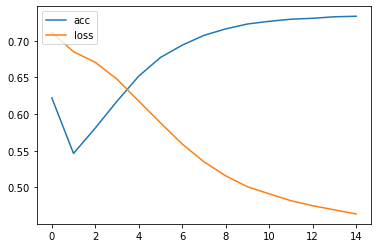

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [51]:
y_pred = np.where(dnn_model.predict(smv_X_test_df.values)>=0.55, 1, 0).reshape(3, 500)

In [52]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.7166666666666667
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      1016
         1.0       0.61      0.33      0.43       484

    accuracy                           0.72      1500
   macro avg       0.68      0.62      0.62      1500
weighted avg       0.70      0.72      0.69      1500




######################################################################
#                            Person n°: 0                            #
######################################################################
    


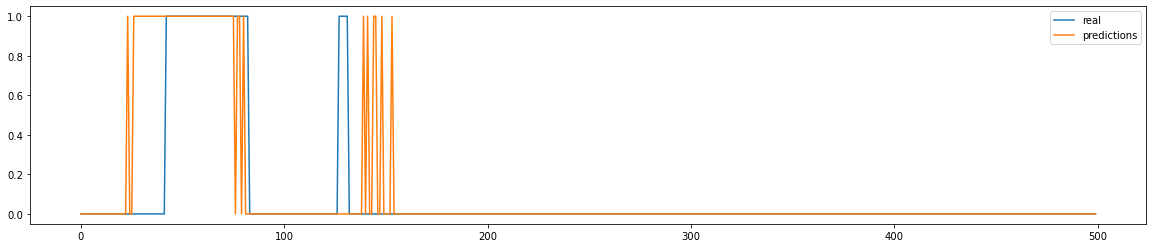

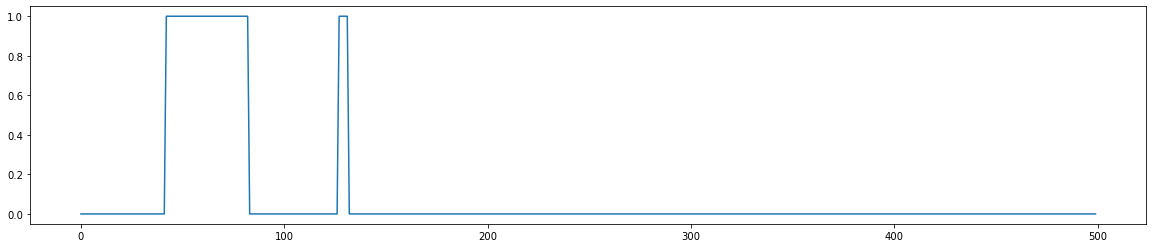

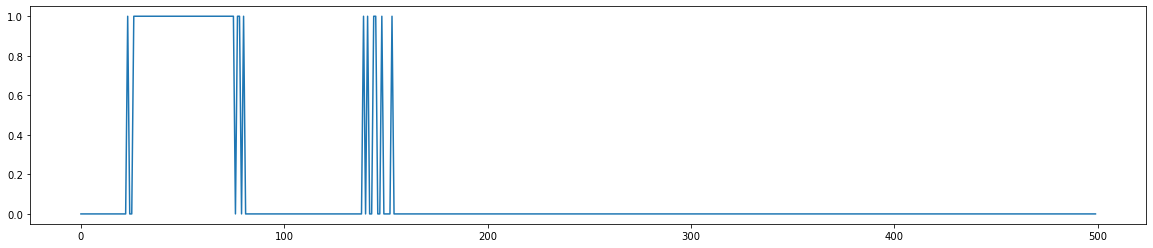


######################################################################
#                            Person n°: 1                            #
######################################################################
    


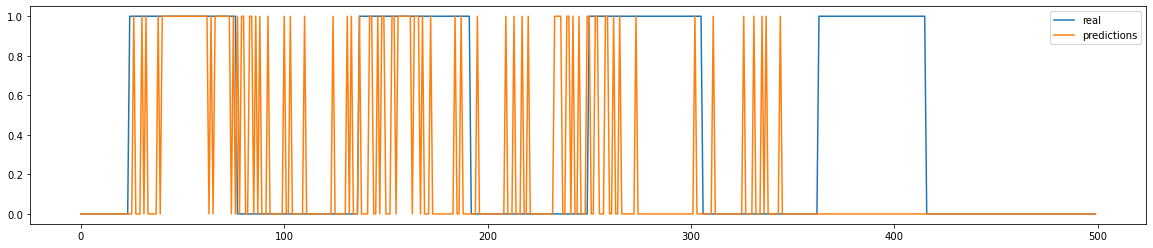

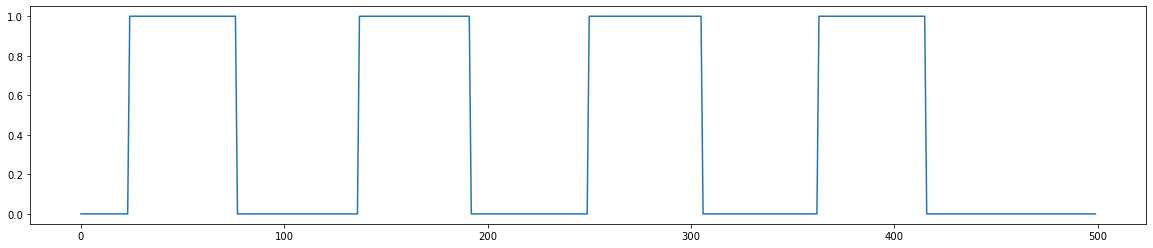

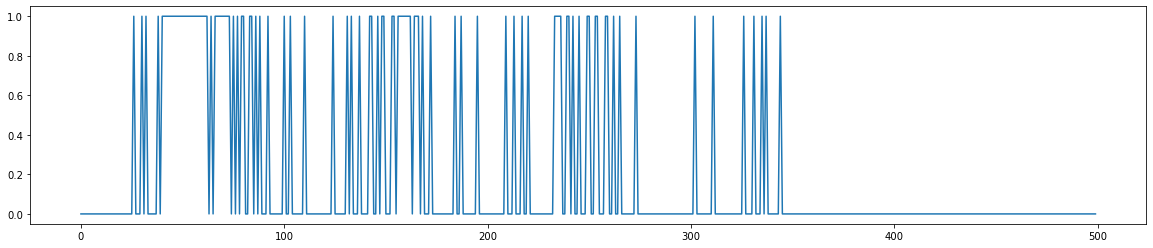


######################################################################
#                            Person n°: 2                            #
######################################################################
    


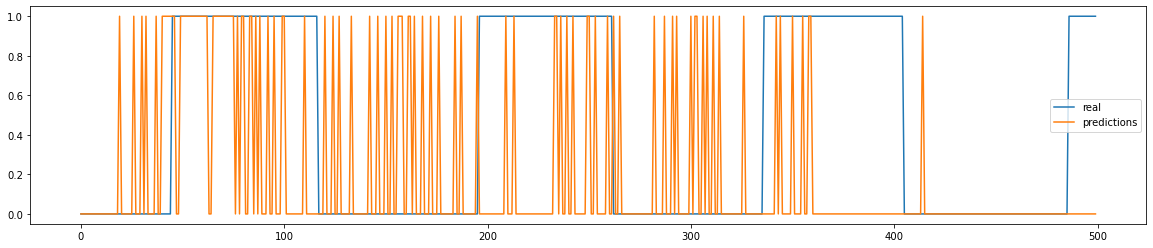

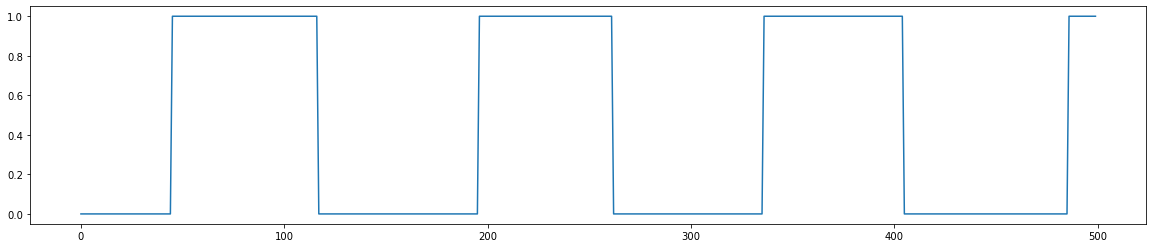

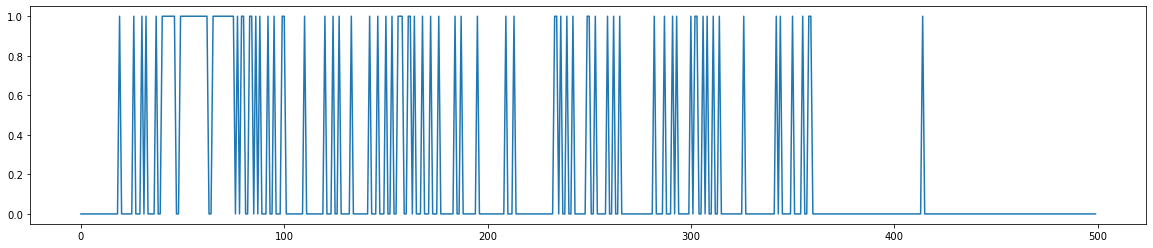

In [53]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [20]:
counts = y_train_df.apply(pd.Series.value_counts, axis=1).sum(axis=0)

In [21]:
one_count = counts[1] / (counts[0] + counts[1])
zero_count = counts[0] / (counts[0] + counts[1])

In [22]:
zero_count

0.8445222599509526

In [23]:
print(smv_X_train_df.shape, smv_X_test_df.shape)
print(y_train_df.shape, y_test_df.shape)

(72, 1178) (3, 1178)
(72, 1178) (3, 1178)


In [24]:
y_train_df.sum(axis=1).describe()

count     72.000000
mean     183.152778
std      111.512099
min       27.000000
25%      112.250000
50%      169.500000
75%      210.750000
max      601.000000
dtype: float64

In [54]:
smv_X_train_df_r = smv_X_train_df.values.reshape(smv_X_train_df.shape[0], smv_X_train_df.shape[1], 1)
smv_X_test_df_r = smv_X_test_df.values.reshape(smv_X_test_df.shape[0], smv_X_test_df.shape[1], 1)

In [55]:
class BLSTMModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(BLSTMModel, self).__init__()
        
        self.lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(500, 1), return_sequences=True))
        self.lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
        self.fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        x = self.lstm1(inputs)
        x = self.lstm2(x)
        x = self.fc1(x)
        return x

In [56]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [57]:
n_epochs = 5
bs = 2048
blstm_model = BLSTMModel()

blstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = blstm_model.fit(
    smv_X_train_df_r, y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/5
3/3 [==============================] - 13s 585ms/step - loss: 0.6941 - tp: 5337.0000 - fp: 5679.0000 - tn: 14574.5000 - fn: 4409.5000 - accuracy: 0.6611 - precision: 0.4845 - recall: 0.6076 - auc: 0.5557 - prc: 0.4241
Epoch 2/5
3/3 [==============================] - 2s 612ms/step - loss: 0.6801 - tp: 3516.5000 - fp: 3763.5000 - tn: 16508.7500 - fn: 6211.2500 - accuracy: 0.6662 - precision: 0.3621 - recall: 0.3142 - auc: 0.4734 - prc: 0.3591
Epoch 3/5
3/3 [==============================] - 2s 601ms/step - loss: 0.6641 - tp: 6926.0000 - fp: 7198.2500 - tn: 13126.7500 - fn: 2749.0000 - accuracy: 0.6677 - precision: 0.4905 - recall: 0.7505 - auc: 0.7549 - prc: 0.4971
Epoch 4/5
3/3 [==============================] - 2s 596ms/step - loss: 0.6381 - tp: 187.2500 - fp: 289.7500 - tn: 19908.0000 - fn: 9615.0000 - accuracy: 0.6664 - precision: 0.3740 - recall: 0.0183 - auc: 0.7322 - prc: 0.4775
Epoch 5/5
3/3 [==============================] - 2s 591ms/step - loss: 0.5791 - tp: 3907.0000

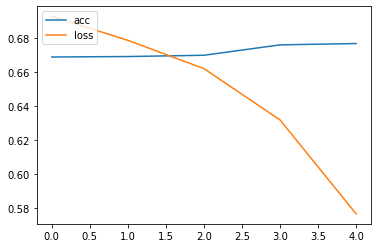

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [60]:
y_pred = np.where(blstm_model.predict(smv_X_test_df_r)>=0.5, 1, 0).reshape(3, 500)

In [61]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.6273333333333333
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      1016
         1.0       0.41      0.35      0.37       484

    accuracy                           0.63      1500
   macro avg       0.56      0.55      0.55      1500
weighted avg       0.61      0.63      0.62      1500



In [62]:
print(classification_report(y_test_df.values, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



######################################################################
#                            Person n°: 0                            #
######################################################################
    


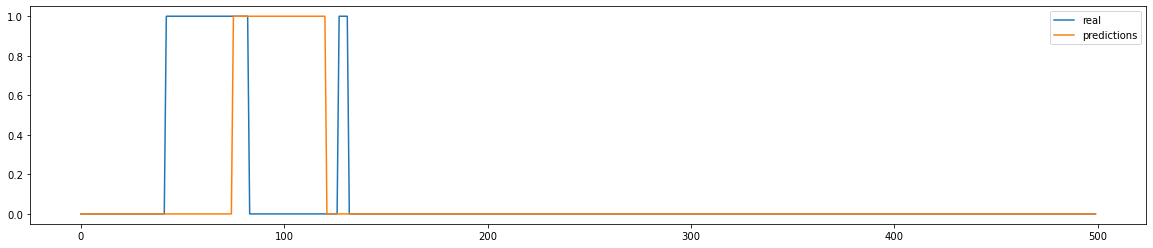

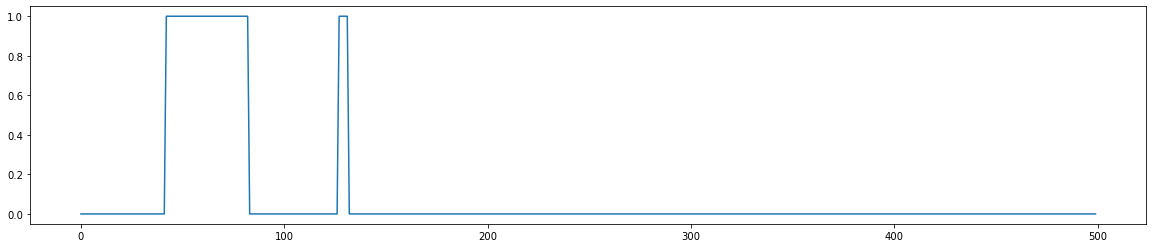

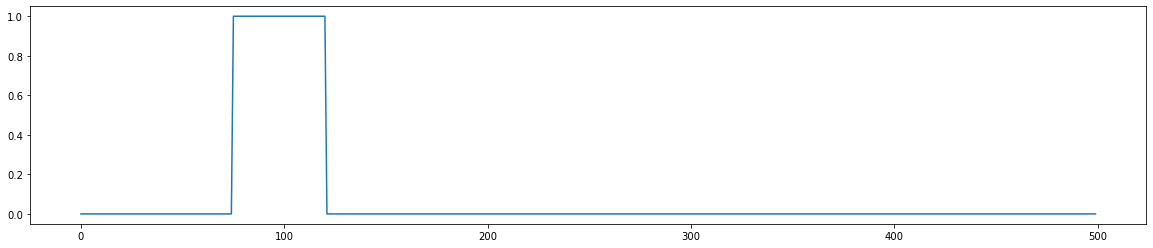


######################################################################
#                            Person n°: 1                            #
######################################################################
    


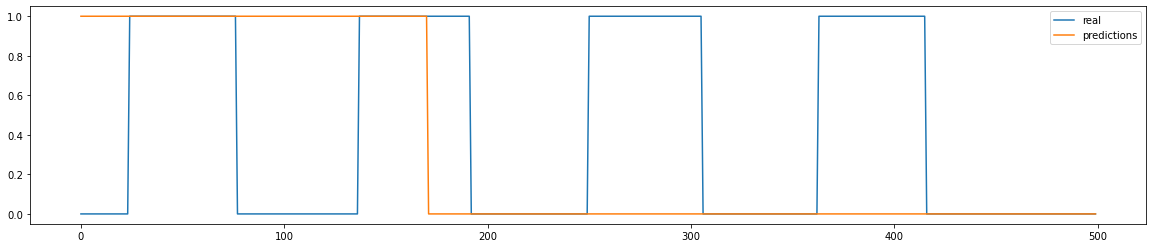

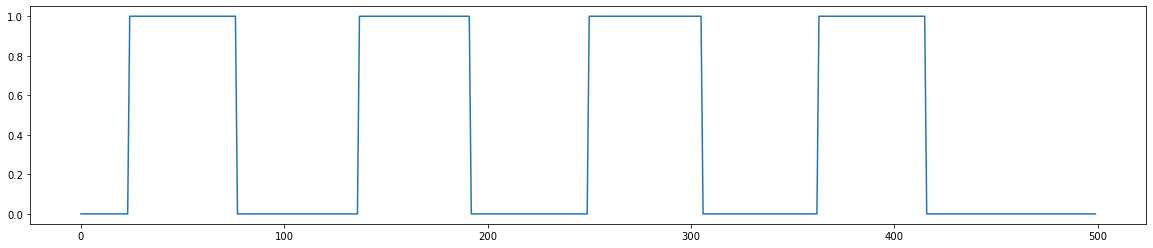

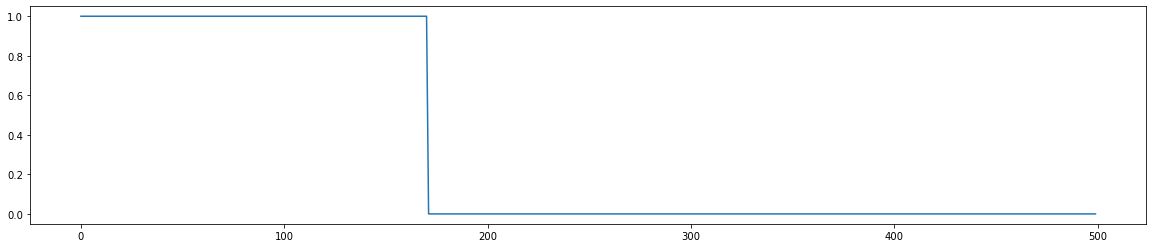


######################################################################
#                            Person n°: 2                            #
######################################################################
    


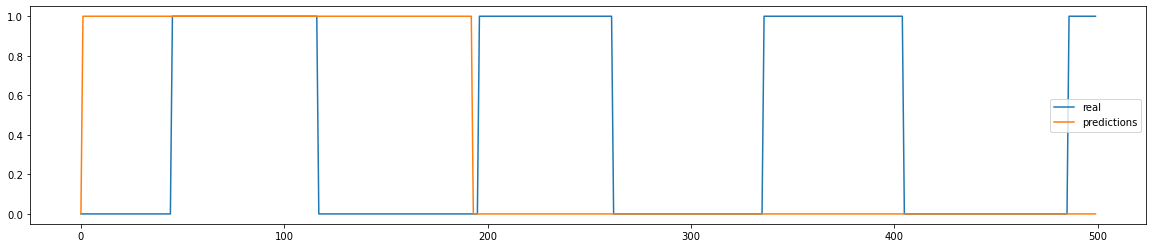

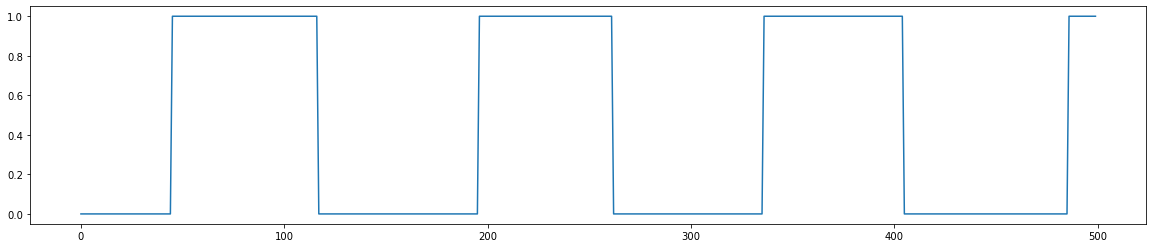

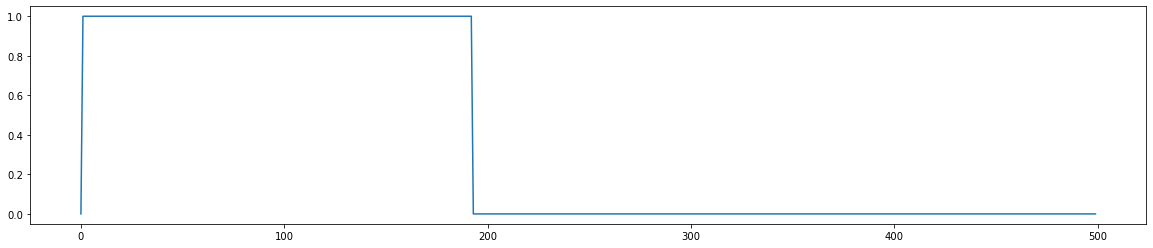

In [63]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [64]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [67]:
xholo_train = train_df['xHolo'].iloc[:,:500]
yholo_train = train_df['yHolo'].iloc[:,:500]
zholo_train = train_df['zHolo'].iloc[:,:500]

xholo_test = test_df['xHolo'].iloc[:,:500]
yholo_test = test_df['yHolo'].iloc[:,:500]
zholo_test = test_df['zHolo'].iloc[:,:500]

In [68]:
xholo_train

seq_idx,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
id,,,,,,,,,,,,,,,,,,,,,
11_hlth,0.314562,0.313492,0.312400,0.311276,0.310112,0.308897,0.307623,0.306282,0.304868,0.303377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
11_lvl_one,0.329497,0.328270,0.327006,0.325701,0.324351,0.322951,0.321492,0.319969,0.318376,0.316705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
11_lvl_two,0.342550,0.341885,0.341187,0.340467,0.339734,0.338994,0.338255,0.337520,0.336792,0.336074,...,0.255421,0.256164,0.256933,0.257733,0.258566,0.259434,0.26034,0.261285,0.262268,0.26329
12_hlth,0.191283,0.191382,0.191559,0.191814,0.192148,0.192562,0.193056,0.193632,0.194291,0.195033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
12_lvl_one,0.293994,0.291083,0.288221,0.285421,0.282698,0.280063,0.277525,0.275094,0.272774,0.270571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_lvl_one,0.269693,0.271648,0.273580,0.275480,0.277342,0.279162,0.280933,0.282651,0.284315,0.285919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
8_lvl_two,0.372910,0.373018,0.373125,0.373224,0.373310,0.373376,0.373410,0.373400,0.373330,0.373189,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
9_hlth,0.330707,0.330411,0.330061,0.329656,0.329196,0.328677,0.328100,0.327462,0.326762,0.325997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000


In [69]:
xholo_train_r = xholo_train.values.reshape(xholo_train.shape[0], xholo_train.shape[1], 1)
yholo_train_r = yholo_train.values.reshape(yholo_train.shape[0], yholo_train.shape[1], 1)
zholo_train_r = zholo_train.values.reshape(zholo_train.shape[0], zholo_train.shape[1], 1)

xholo_test_r = xholo_test.values.reshape(xholo_test.shape[0], xholo_test.shape[1], 1)
yholo_test_r = yholo_test.values.reshape(yholo_test.shape[0], yholo_test.shape[1], 1)
zholo_test_r = zholo_test.values.reshape(zholo_test.shape[0], zholo_test.shape[1], 1)

In [70]:
xholo_train.shape

(72, 500)

In [108]:
class BLSTMMultiModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(BLSTMMultiModel, self).__init__()
        
        self.lstm1_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True))
        self.lstm2_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
        
        self.lstm1_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True))
        self.lstm2_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
        
        self.lstm1_3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True))
        self.lstm2_3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
        
        self.fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        input_x = inputs[0]
        input_y = inputs[1]
        input_z = inputs[2]
        
        x_1 = self.lstm1_1(input_x)
        x_1 = self.lstm2_1(x_1)
        
        x_2 = self.lstm1_2(input_y)
        x_2 = self.lstm2_2(x_2)
        
        x_3 = self.lstm1_3(input_z)
        x_3 = self.lstm2_3(x_3)
        
        x = tf.keras.layers.Concatenate()([x_1, x_2, x_3])
        
        x = self.fc1(x)
        return x

In [109]:
n_epochs = 5
bs = 2048
blstm_multi_model = BLSTMMultiModel()

blstm_multi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = blstm_multi_model.fit(
    [xholo_train_r, yholo_train_r, zholo_train_r], y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/5
3/3 [==============================] - 39s 1s/step - loss: 0.6928 - tp: 6681.0000 - fp: 5990.0000 - tn: 38688.5000 - fn: 14640.5000 - accuracy: 0.6875 - precision: 0.5278 - recall: 0.3140 - auc: 0.6532 - prc: 0.5002
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 0.6746 - tp: 6367.0000 - fp: 6397.7500 - tn: 13874.5000 - fn: 3360.7500 - accuracy: 0.6726 - precision: 0.4991 - recall: 0.6585 - auc: 0.7347 - prc: 0.5046
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 0.6531 - tp: 915.0000 - fp: 995.2500 - tn: 19329.7500 - fn: 8760.0000 - accuracy: 0.6741 - precision: 0.4790 - recall: 0.1055 - auc: 0.7200 - prc: 0.4777
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 0.6262 - tp: 777.7500 - fp: 624.2500 - tn: 19573.5000 - fn: 9024.5000 - accuracy: 0.6750 - precision: 0.5747 - recall: 0.0721 - auc: 0.7427 - prc: 0.4987
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 0.5797 - tp: 4256.2500 - fp: 4229.5000

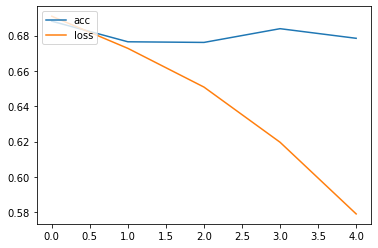

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [91]:
y_pred = np.where(blstm_multi_model.predict([xholo_test_r, yholo_test_r, zholo_test_r])>=0.5, 1, 0).reshape(3, 500)

In [92]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.664
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76      1016
         1.0       0.48      0.45      0.46       484

    accuracy                           0.66      1500
   macro avg       0.61      0.61      0.61      1500
weighted avg       0.66      0.66      0.66      1500




######################################################################
#                            Person n°: 0                            #
######################################################################
    


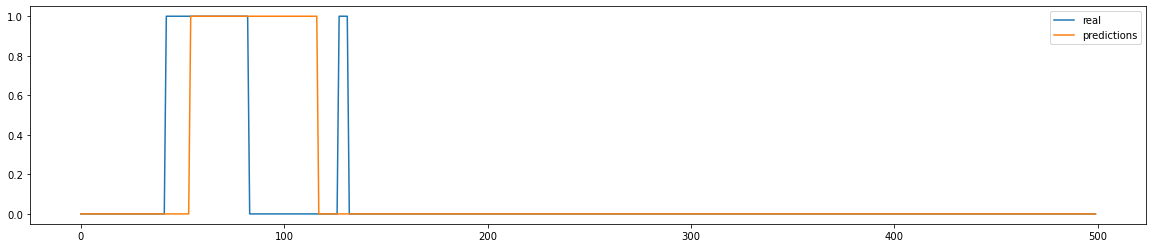

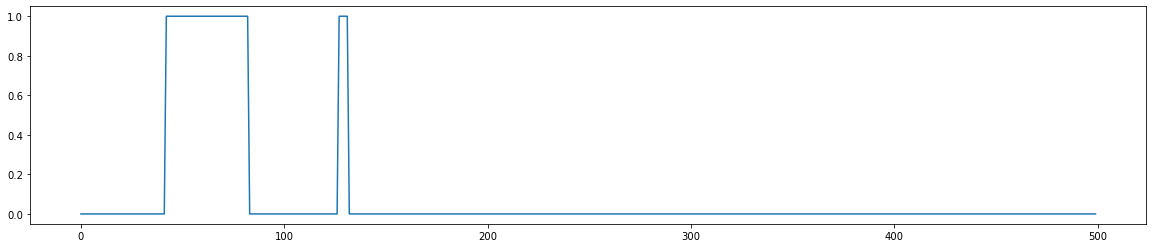

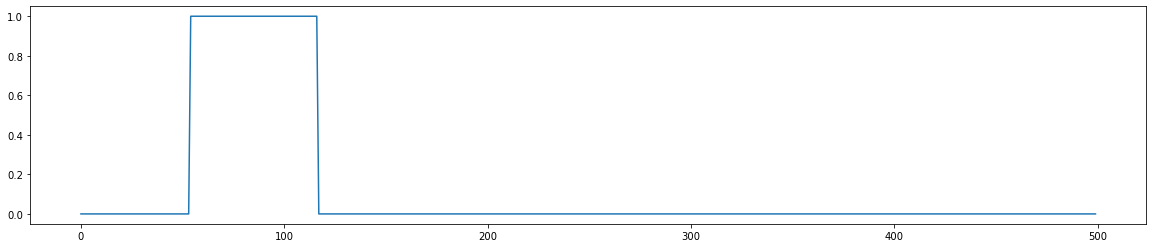


######################################################################
#                            Person n°: 1                            #
######################################################################
    


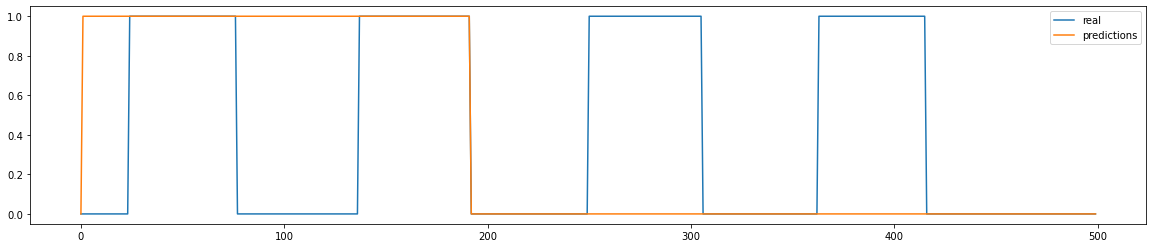

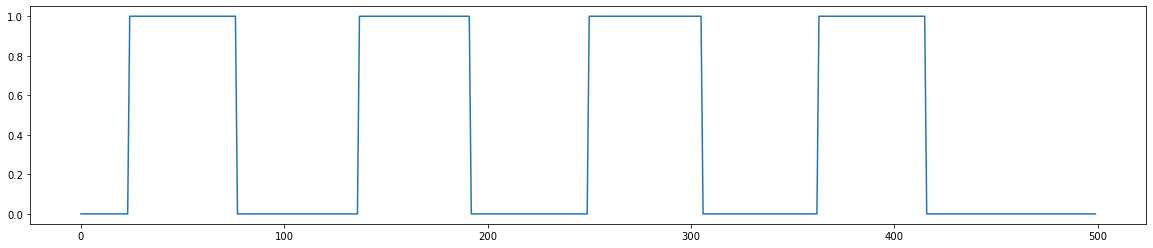

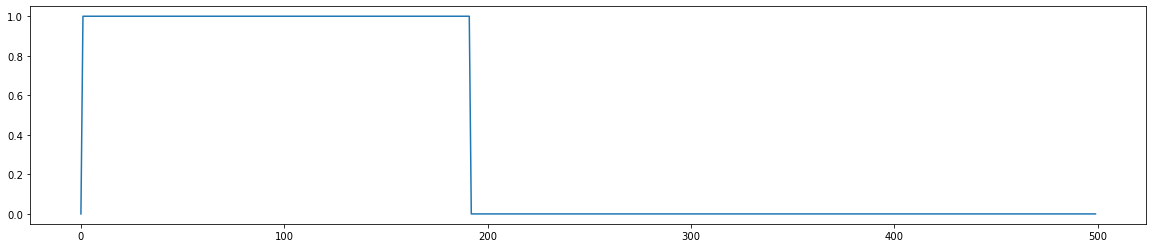


######################################################################
#                            Person n°: 2                            #
######################################################################
    


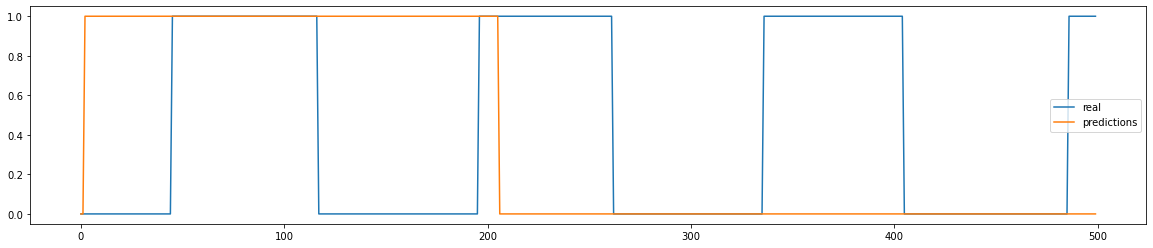

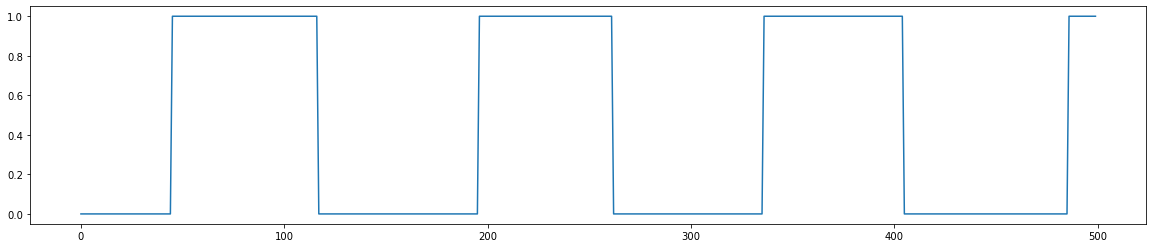

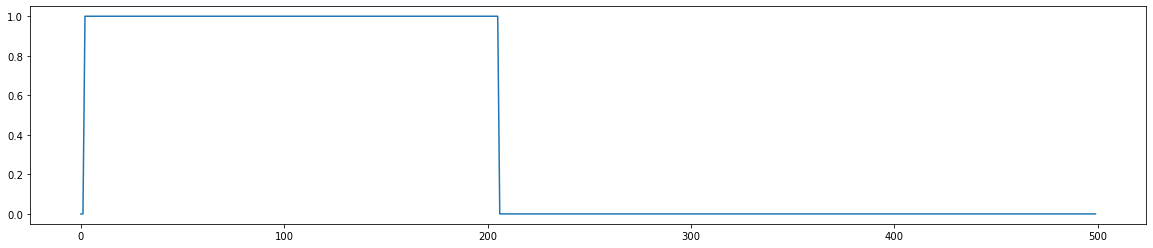

In [93]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [96]:
class DNNMultiModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(DNNMultiModel, self).__init__()
        
        self.dnn1_1 = tf.keras.layers.Dense(256, input_shape=(500,), activation='relu')
        self.dnn1_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.dnn2_1 = tf.keras.layers.Dense(256, input_shape=(500,), activation='relu')
        self.dnn2_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.dnn3_1 = tf.keras.layers.Dense(256, input_shape=(500,), activation='relu')
        self.dnn3_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.fc1 = tf.keras.layers.Dense(500, activation='sigmoid')
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        input_x = inputs[0]
        input_y = inputs[1]
        input_z = inputs[2]
        
        x_1 = self.dnn1_1(input_x)
        x_1 = self.dnn1_2(x_1)
        
        x_2 = self.dnn2_1(input_y)
        x_2 = self.dnn2_2(x_2)
        
        x_3 = self.dnn3_1(input_z)
        x_3 = self.dnn3_2(x_3)
        
        x = tf.keras.layers.Concatenate()([x_1, x_2, x_3])
        x = self.fc1(x)
        return x

In [97]:
n_epochs = 5
bs = 2048
dnn_multi_model = DNNMultiModel()

dnn_multi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = dnn_multi_model.fit(
    [xholo_train.values, yholo_train.values, zholo_train.values], y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/5
3/3 [==============================] - 3s 44ms/step - loss: 0.7033 - tp: 7531.5000 - fp: 11377.2500 - tn: 33301.2500 - fn: 13790.0000 - accuracy: 0.6190 - precision: 0.3988 - recall: 0.3513 - auc: 0.6447 - prc: 0.3994
Epoch 2/5
3/3 [==============================] - 0s 45ms/step - loss: 0.5922 - tp: 4113.5000 - fp: 3208.2500 - tn: 17064.0000 - fn: 5614.2500 - accuracy: 0.7040 - precision: 0.5624 - recall: 0.4232 - auc: 0.6886 - prc: 0.5431
Epoch 3/5
3/3 [==============================] - 0s 47ms/step - loss: 0.5359 - tp: 3618.7500 - fp: 2062.5000 - tn: 18262.5000 - fn: 6056.2500 - accuracy: 0.7291 - precision: 0.6370 - recall: 0.3747 - auc: 0.7491 - prc: 0.6017
Epoch 4/5
3/3 [==============================] - 0s 48ms/step - loss: 0.5003 - tp: 3884.0000 - fp: 2037.2500 - tn: 18160.5000 - fn: 5918.2500 - accuracy: 0.7323 - precision: 0.6574 - recall: 0.3940 - auc: 0.7971 - prc: 0.6474
Epoch 5/5
3/3 [==============================] - 0s 40ms/step - loss: 0.4614 - tp: 4526.0000 -

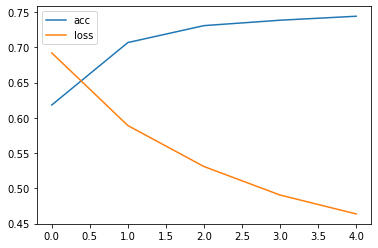

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [103]:
y_pred = np.where(dnn_multi_model.predict([xholo_test, yholo_test, zholo_test])>=0.6, 1, 0).reshape(3, 500)

In [104]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.7153333333333334
              precision    recall  f1-score   support

         0.0       0.72      0.94      0.82      1016
         1.0       0.66      0.24      0.36       484

    accuracy                           0.72      1500
   macro avg       0.69      0.59      0.59      1500
weighted avg       0.70      0.72      0.67      1500




######################################################################
#                            Person n°: 0                            #
######################################################################
    


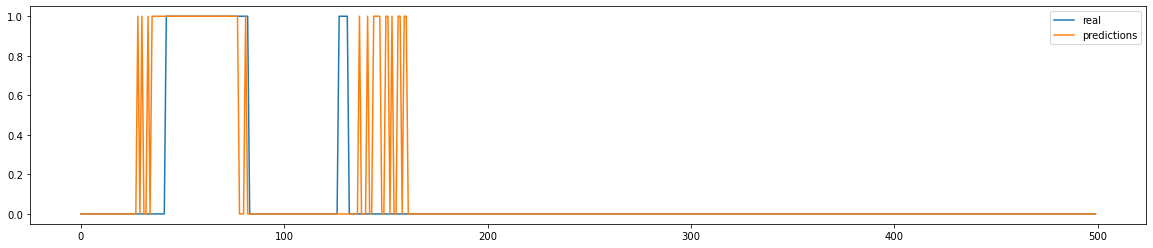

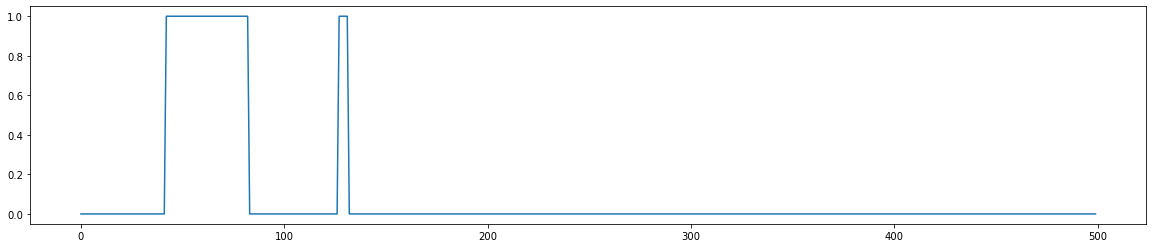

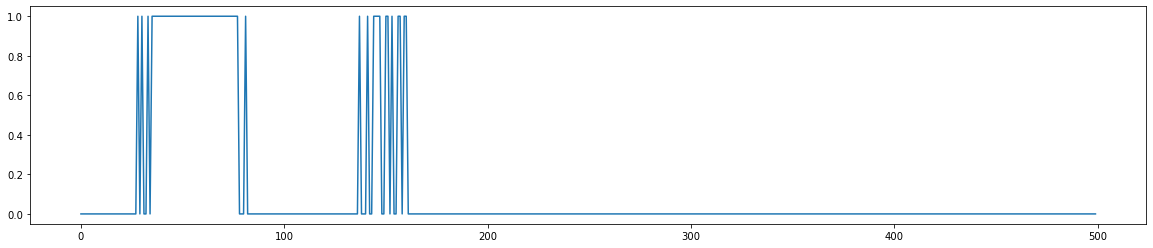


######################################################################
#                            Person n°: 1                            #
######################################################################
    


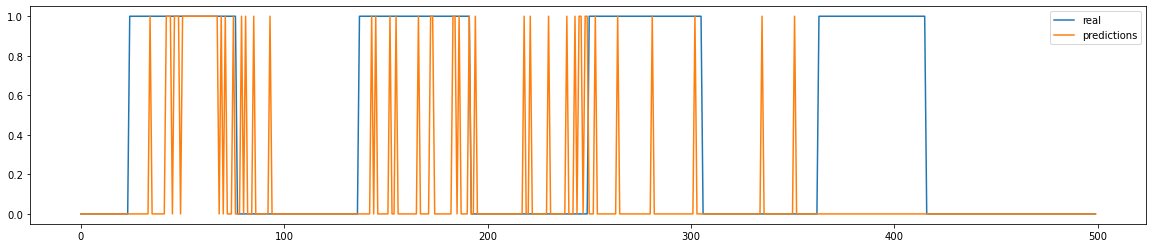

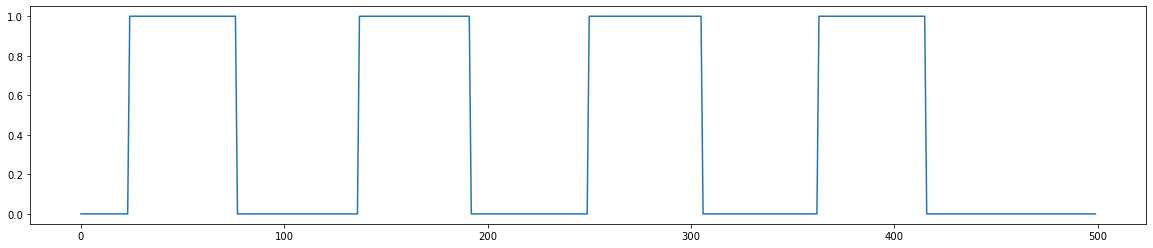

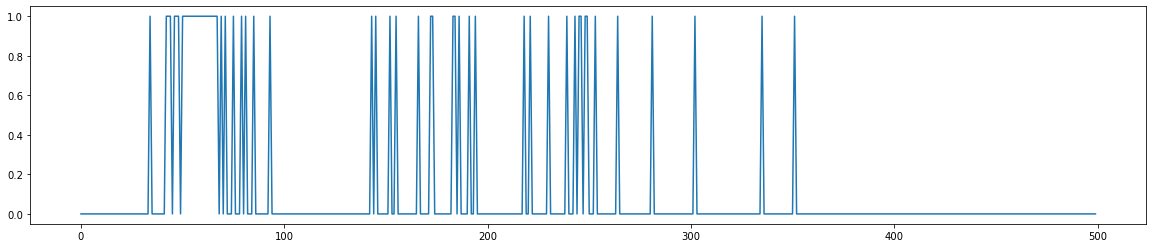


######################################################################
#                            Person n°: 2                            #
######################################################################
    


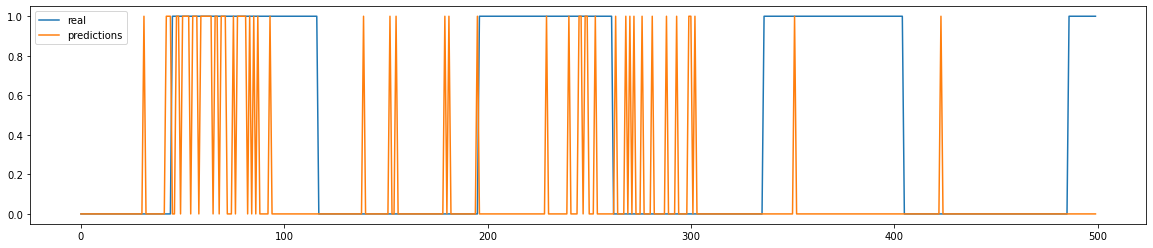

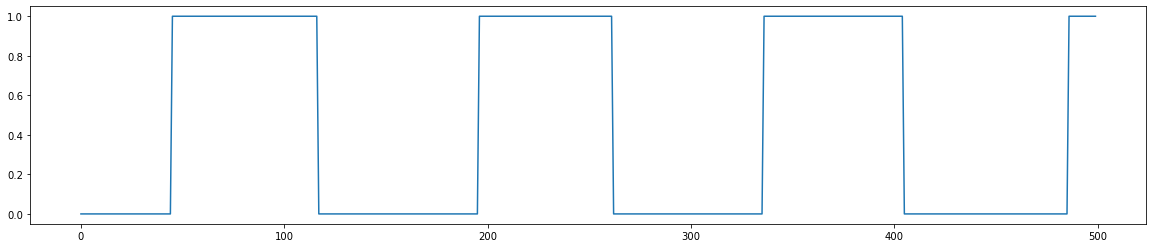

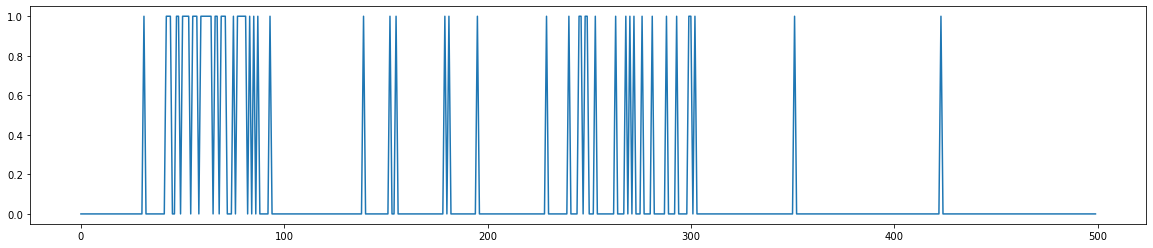

In [105]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()